In [1]:
import pandas as pd
import numpy as np 
from sklearn.datasets import fetch_covtype

In [3]:
data = fetch_covtype(as_frame=True)

In [6]:
print(data.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

In [8]:
X = data.data

In [9]:
y = data.target

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [13]:
y.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [14]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=7, n_init='auto', random_state=50)

In [17]:
kmeans.fit(X)

KMeans(n_clusters=7, n_init='auto', random_state=50)

In [21]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([ 71357,  62357, 159840,  37995,  26951,  99852, 122660]))

In [22]:
kmeans.labels_.shape

(581012,)

In [24]:
# Credit function to map labels to ground truths:
# https://stackoverflow.com/a/70712742/18628303 

from itertools import permutations
def match_labels(labels, labels0, K):
    perms = list(permutations(range(1, K+1)))
    nmatch = 0
    for jperm, perm in enumerate(perms):
        labs = np.array([perm[l] for l in labels])
        newmatch = (labs == labels0).sum()
        if newmatch > nmatch:
            nmatch = newmatch
            newlabels = labs
            matchtable = list(perm)
    return newlabels, matchtable
predictions, _ = match_labels(kmeans.labels_, y, 7)

In [27]:
predictions.shape

(581012,)

In [30]:
import sklearn.metrics as m
print(m.classification_report(predictions, y))


              precision    recall  f1-score   support

           1       0.20      0.43      0.28     99852
           2       0.23      0.52      0.32    122660
           3       0.88      0.20      0.32    159840
           4       0.00      0.00      0.00     37995
           5       0.04      0.01      0.01     62357
           6       0.00      0.00      0.00     26951
           7       0.30      0.09      0.13     71357

    accuracy                           0.25    581012
   macro avg       0.24      0.18      0.15    581012
weighted avg       0.37      0.25      0.22    581012



In [32]:
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df = pd.read_csv('../livecoding-data/marketing_campaign.csv', sep='\t')

In [62]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [64]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [65]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [66]:
df.Dt_Customer

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [67]:
df_dummies = df[['Education', 'Marital_Status']]

In [68]:
df_dummies = pd.get_dummies(df_dummies)

In [69]:
df = df.drop(['Education', 'Marital_Status', 'Dt_Customer', 'ID'], axis=1)

In [70]:
X = pd.concat([df, df_dummies], axis=1)

In [77]:
X['Income'] = X['Income'].fillna(X.Income.mean())

In [78]:
X

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,0,1,0,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0,1,0,0,0,0,0,1,0,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,1,0,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,1,0,0,0,0,0,0,1,0,0


In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   int64  
 1   Income                   2240 non-null   float64
 2   Kidhome                  2240 non-null   int64  
 3   Teenhome                 2240 non-null   int64  
 4   Recency                  2240 non-null   int64  
 5   MntWines                 2240 non-null   int64  
 6   MntFruits                2240 non-null   int64  
 7   MntMeatProducts          2240 non-null   int64  
 8   MntFishProducts          2240 non-null   int64  
 9   MntSweetProducts         2240 non-null   int64  
 10  MntGoldProds             2240 non-null   int64  
 11  NumDealsPurchases        2240 non-null   int64  
 12  NumWebPurchases          2240 non-null   int64  
 13  NumCatalogPurchases      2240 non-null   int64  
 14  NumStorePurchases       

In [82]:
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)

In [83]:
X_scaled.shape

(2240, 38)

In [96]:
wcss = []
labels = {}

for i in range(3, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=50)
    kmeans.fit(X_scaled)
    labels[f'{i}_clusters'] = kmeans.labels_
    wcss.append(kmeans.inertia_)

In [97]:
wcss

[4131.298437870413,
 3799.2636170348046,
 3602.162059427632,
 3477.5742738488143,
 3156.1744477436387,
 3077.292627568357,
 2840.6321130002443,
 2756.7767900928716]

In [98]:
labels

{'3_clusters': array([0, 0, 0, ..., 0, 1, 2], dtype=int32),
 '4_clusters': array([0, 0, 0, ..., 0, 1, 2], dtype=int32),
 '5_clusters': array([0, 0, 0, ..., 0, 1, 2], dtype=int32),
 '6_clusters': array([4, 5, 0, ..., 1, 3, 2], dtype=int32),
 '7_clusters': array([6, 6, 0, ..., 6, 1, 2], dtype=int32),
 '8_clusters': array([3, 3, 0, ..., 1, 5, 4], dtype=int32),
 '9_clusters': array([3, 3, 0, ..., 1, 5, 4], dtype=int32),
 '10_clusters': array([3, 3, 0, ..., 1, 5, 4], dtype=int32)}

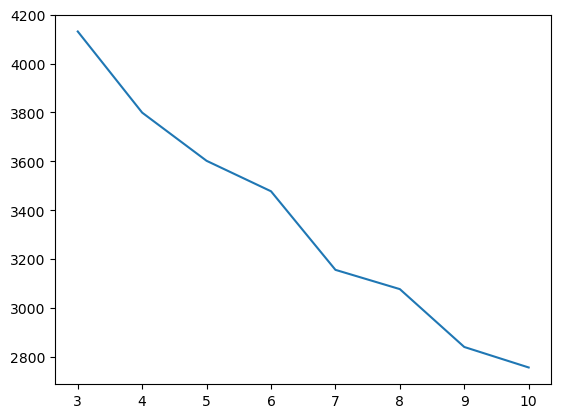

In [99]:
import matplotlib.pyplot as plt
plt.plot(range(3,11), wcss)

In [102]:
df_labelled = df.copy()

In [103]:
df_labelled['label'] = labels['7_clusters']

In [105]:
df_labelled.label.value_counts()

2    457
6    432
5    411
0    339
1    237
3    233
4    131
Name: label, dtype: int64

In [107]:
df_labelled[df_labelled.label == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,339.0,1969.280236,11.285480,1946.0,1959.5,1970.0,1978.0,1994.0
Income,337.0,50955.454006,39642.428700,7500.0,32474.0,47821.0,66664.0,666666.0
Kidhome,339.0,0.501475,0.545962,0.0,0.0,0.0,1.0,2.0
Teenhome,339.0,0.504425,0.534998,0.0,0.0,0.0,1.0,2.0
Recency,339.0,50.386431,29.076841,0.0,26.0,51.0,76.0,99.0
MntWines,339.0,243.377581,278.069335,0.0,13.0,121.0,398.5,1224.0
MntFruits,339.0,26.746313,39.554404,0.0,2.0,10.0,31.0,183.0
MntMeatProducts,339.0,151.775811,222.206132,1.0,15.0,60.0,192.5,1725.0
MntFishProducts,339.0,42.890855,60.792035,0.0,3.0,12.0,63.0,258.0
MntSweetProducts,339.0,27.646018,40.958975,0.0,2.0,8.0,31.0,196.0


In [108]:
df_labelled[df_labelled.label == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,237.0,1966.413502,11.734614,1900.0,1957.0,1968.0,1975.0,1992.0
Income,233.0,50132.180258,20437.662660,6560.0,35924.0,47352.0,63972.0,157733.0
Kidhome,237.0,0.472574,0.540996,0.0,0.0,0.0,1.0,2.0
Teenhome,237.0,0.531646,0.524859,0.0,0.0,1.0,1.0,2.0
Recency,237.0,48.801688,28.970008,0.0,24.0,51.0,76.0,99.0
MntWines,237.0,295.502110,329.008096,0.0,33.0,162.0,505.0,1288.0
MntFruits,237.0,20.502110,30.954672,0.0,2.0,7.0,28.0,168.0
MntMeatProducts,237.0,147.582278,203.230099,0.0,19.0,59.0,186.0,921.0
MntFishProducts,237.0,31.822785,50.850085,0.0,2.0,8.0,37.0,258.0
MntSweetProducts,237.0,19.932489,31.982710,0.0,2.0,6.0,20.0,153.0


In [109]:
df_labelled[df_labelled.label == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,457.0,1965.789934,11.801337,1899.0,1957.00,1967.0,1974.0,1991.0
Income,452.0,54644.070796,20143.171802,4023.0,39373.75,54177.0,67488.0,162397.0
Kidhome,457.0,0.426696,0.545706,0.0,0.00,0.0,1.0,2.0
Teenhome,457.0,0.623632,0.556589,0.0,0.00,1.0,1.0,2.0
Recency,457.0,49.091904,28.504853,0.0,24.00,50.0,72.0,99.0
MntWines,457.0,371.932166,363.367802,2.0,42.00,241.0,611.0,1396.0
MntFruits,457.0,19.614880,33.410663,0.0,0.00,3.0,22.0,197.0
MntMeatProducts,457.0,155.765864,220.523331,1.0,16.00,62.0,192.0,1622.0
MntFishProducts,457.0,25.240700,39.938811,0.0,0.00,6.0,32.0,240.0
MntSweetProducts,457.0,18.717724,32.926439,0.0,0.00,3.0,25.0,262.0


In [110]:
df_labelled[df_labelled.label == 3].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,233.0,1969.991416,11.672245,1943.0,1961.00,1972.0,1978.00,1996.0
Income,232.0,46664.693966,20173.575996,7500.0,30455.25,45994.0,62731.75,90226.0
Kidhome,233.0,0.493562,0.550236,0.0,0.00,0.0,1.00,2.0
Teenhome,233.0,0.493562,0.558015,0.0,0.00,0.0,1.00,2.0
Recency,233.0,46.742489,30.778586,0.0,19.00,44.0,76.00,99.0
MntWines,233.0,214.300429,278.330204,0.0,12.00,63.0,349.00,1205.0
MntFruits,233.0,20.141631,34.334958,0.0,2.00,6.0,21.00,194.0
MntMeatProducts,233.0,103.309013,160.205199,1.0,12.00,33.0,112.00,925.0
MntFishProducts,233.0,30.888412,49.574965,0.0,3.00,10.0,30.00,259.0
MntSweetProducts,233.0,21.824034,38.677590,0.0,1.00,6.0,18.00,185.0


<Axes: xlabel='label', ylabel='Income'>

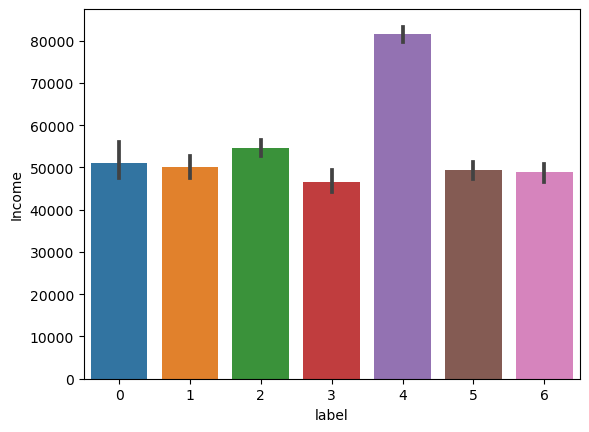

In [113]:
import seaborn as sns
sns.barplot(data=df_labelled, y='Income', x='label')

<Axes: xlabel='label', ylabel='MntWines'>

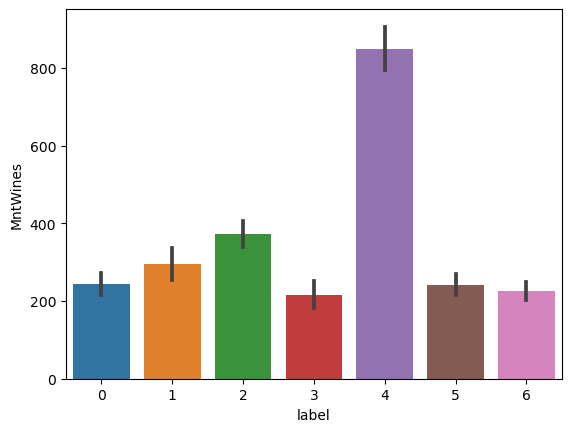

In [116]:
sns.barplot(data=df_labelled, y='MntWines', x='label')

<Axes: xlabel='label', ylabel='MntGoldProds'>

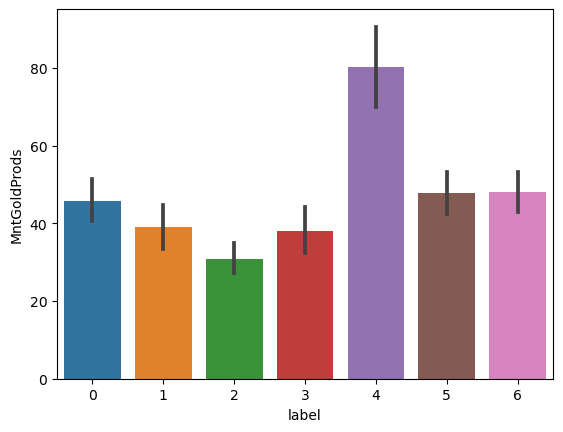

In [117]:
sns.barplot(data=df_labelled, y='MntGoldProds', x='label')

In [119]:
df_9 = df.copy()

In [120]:
df_9['label'] = labels['9_clusters']

<Axes: xlabel='label', ylabel='Count'>

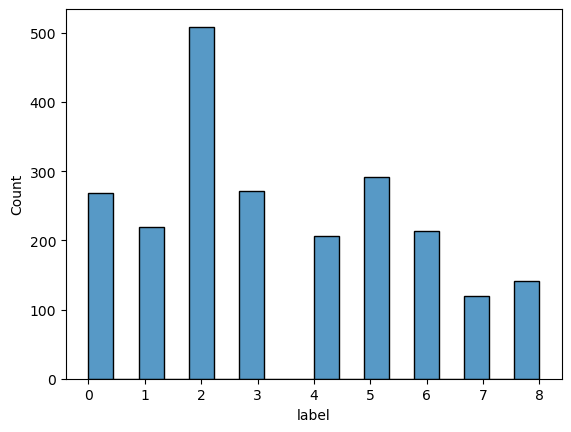

In [125]:
sns.histplot(df_9.label)

In [126]:
df_9.label.value_counts()

2    509
5    291
3    272
0    269
1    219
6    213
4    207
8    141
7    119
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='Income'>

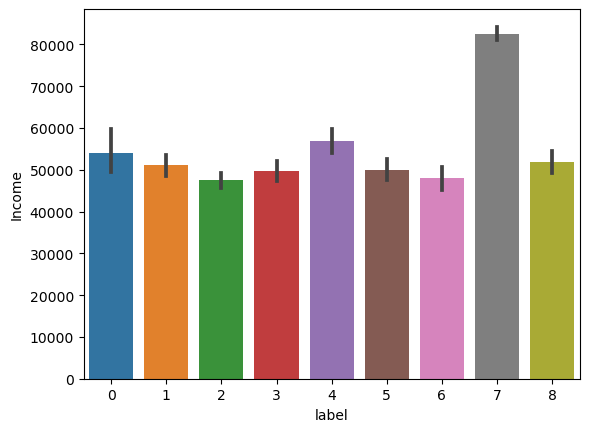

In [128]:
sns.barplot(data=df_9, y='Income', x='label')

<Axes: xlabel='label', ylabel='MntWines'>

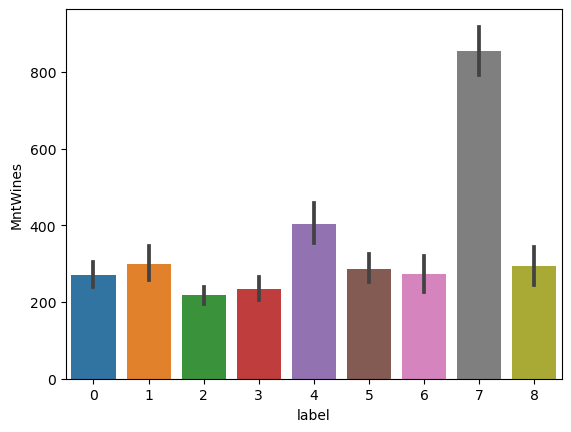

In [129]:
sns.barplot(data=df_9, y='MntWines', x='label')

<Axes: xlabel='label', ylabel='MntGoldProds'>

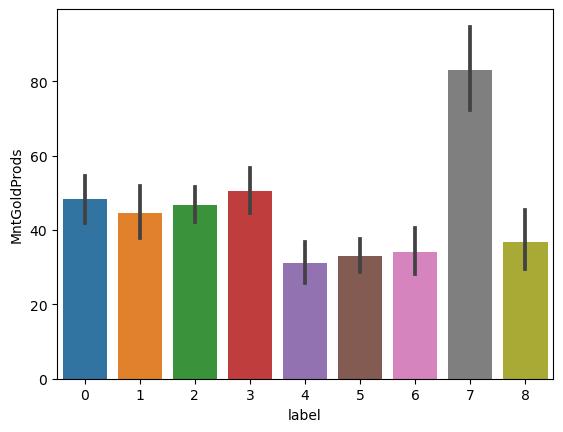

In [130]:
sns.barplot(data=df_9, y='MntGoldProds', x='label')

In [131]:
df_9[df_9.label == 7]

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,label
15,1946,82800.0,0,0,23,1006,22,115,59,68,...,0,0,1,1,0,0,3,11,1,7
53,1977,82582.0,0,0,54,510,120,550,156,40,...,1,0,0,1,0,0,3,11,1,7
55,1955,82384.0,0,0,55,984,51,432,180,120,...,0,0,1,0,0,0,3,11,1,7
60,1982,75777.0,0,0,12,712,26,538,69,13,...,0,1,1,0,0,0,3,11,1,7
67,1979,88194.0,0,1,19,688,14,309,201,24,...,1,0,0,1,0,0,3,11,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,1984,90000.0,0,0,91,675,144,133,94,192,...,1,0,1,1,0,0,3,11,0,7
2171,1970,65706.0,0,0,77,918,10,129,13,0,...,0,1,1,0,1,0,3,11,1,7
2175,1975,79174.0,0,0,2,1074,37,518,193,92,...,0,0,1,1,0,0,3,11,1,7
2193,1957,82347.0,0,0,38,556,54,845,202,133,...,1,0,0,1,0,0,3,11,1,7
